<a href="https://colab.research.google.com/github/LuizHVicari/Sistemas-Inteligentes/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

lista_maca_peso = [168, 201, 184, 216, 177, 230, 149, 192, 206, 219, 177, 194, 241, 162, 207]
lista_maca_diam = [7.7, 9.2, 8.5, 9.8, 8.1, 10.1, 6.9, 8.8, 9.4, 10.0, 8.2, 9.0, 10.6, 7.5, 9.6]
maca = ['maca' for i in range(15)]

lista_laranja_peso = [150, 162, 170, 182, 195, 204, 213, 221, 234, 246, 257, 266, 278, 287, 296]
lista_laranja_diam = [6, 6.5, 6.8, 7.1, 7.4, 7.7, 8, 8.3, 8.6, 8.9, 9.2, 9.5, 9.8, 10.1, 10.4]
laranja = ['laranja' for i in range(15)]

peso = lista_maca_peso + lista_laranja_peso
diam = lista_maca_diam + lista_laranja_diam
frutas = maca + laranja

df = pd.DataFrame(columns=['peso', 'diametro', 'fruta'])
df['peso'] = peso
df['diametro'] = diam
df['fruta'] = frutas

df['fruta'] = df.apply(lambda x : 0 if x['fruta'] == 'maca' else 1, axis=1)

In [100]:
class RandomClassifier():
    def __init__(self):
        self.__a = None
        self.__b = None
        self.__c = None

    def fit(self, X_train : pd.DataFrame, y_train : pd.Series, random_state = 0):
        best_score = 0
        best_a = None
        best_b = None
        best_c = None
        
        np.random.seed(random_state)

        for i in range(10000):

            c = np.random.random_sample()
            a = np.random.random_sample()
            b = np.random.random_sample()

            y_pred = X_train.apply(lambda X: 1 if a * X[0] + c > b *X[1]  else 0, axis=1)
            score = self.score(y_pred, y_train)
            
            if score > best_score:
                best_score = score
                best_a = a
                best_b = b
                best_c = c
        
        self.a = best_a
        self.b = best_b
        self.c = best_c


    def score(self, y_predict, y):
        return sum(y == y_predict) / len(y)

    def predict(self, X_test : pd.DataFrame):
        if self.a != None and self.b != None and self.c != None:
            return X_test.apply(lambda X: 1 if self.a * X[0] + self.c > self.b *X[1]  else 0, axis=1)
        raise Exception('O método fit não foi aplicado')

    def get_constants(self):
        return self.a, self.b, self.c


In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['fruta']), df['fruta'], stratify=df['fruta'], test_size=0.33, random_state=1, shuffle=True)

random_classifier = RandomClassifier()

random_classifier.fit(X_train, y_train)

y_pred_train = random_classifier.predict(X_train)
y_pred_test = random_classifier.predict(X_test)

print(f'Precisão na base de treino: {random_classifier.score(y_pred_train, y_train)}')
print(f'Precisão na base de teste: {random_classifier.score(y_pred_test, y_test)}')

Precisão na base de treino: 1.0
Precisão na base de teste: 0.9


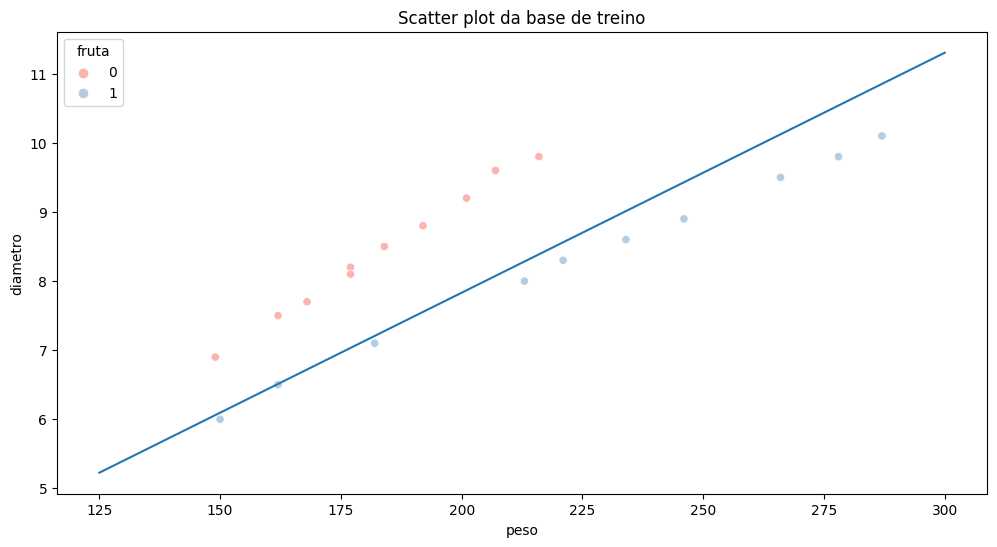

In [102]:
y = lambda x : (x * random_classifier.get_constants()[0] + random_classifier.get_constants()[2]) / random_classifier.get_constants()[1]

plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=X_train, x='peso', y='diametro', hue=y_train, palette='Pastel1')
plt.plot([125, 300], [y(125), y(300)])
plt.title('Scatter plot da base de treino')
plt.show()

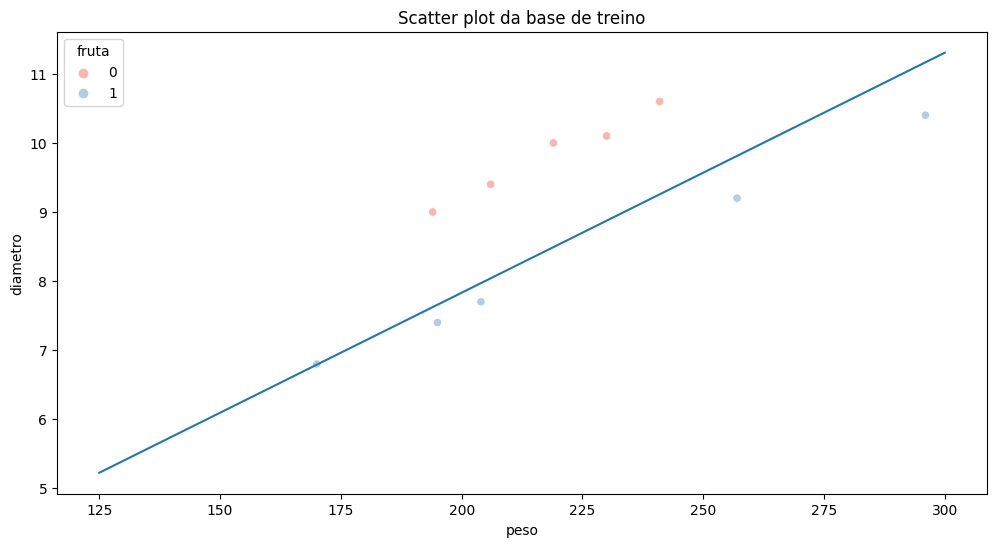

In [103]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=X_test, x='peso', y='diametro', hue=y_test, palette='Pastel1')
plt.plot([125, 300], [y(125), y(300)])
plt.title('Scatter plot da base de treino')
plt.show()